<a href="https://colab.research.google.com/github/UTEDungNguyen/AI-Homework03/blob/main/AI_Homework03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 32.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=b6cc555a38f855f0537ce83acadd6dc2b6d5a54d135ad83aa2b13bf4ecc43eaa
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt



> **Bài toán nồi cơm điện** 🕘



62.012987012987004


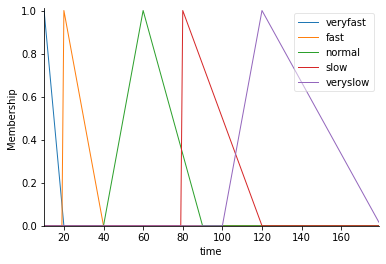

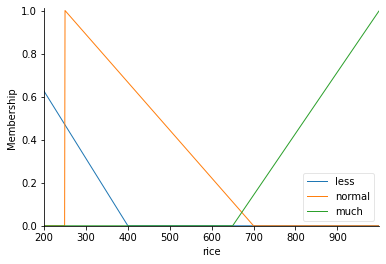

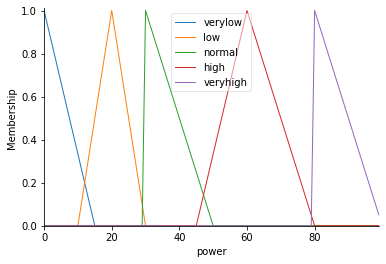

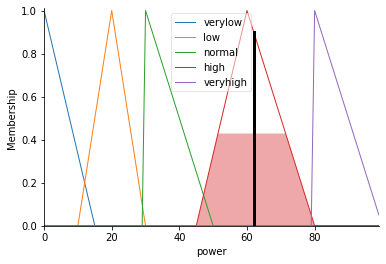

In [10]:
# Các yếu tố ảnh hưởng đến độ chín của cơm
time = ctrl.Antecedent(np.arange(10,180,1), 'time')
rice = ctrl.Antecedent(np.arange(200,1000,1), 'rice')
power = ctrl.Consequent(np.arange(0,100,1), 'power')

# Tạo hàm cho từng yếu tố theo dạng tam giác
time['veryfast'] = fuzz.trimf(time.universe, [10,10,20])
time['fast'] = fuzz.trimf(time.universe, [20,20,40])
time['normal'] = fuzz.trimf(time.universe, [40,60,90])
time['slow'] = fuzz.trimf(time.universe, [80,80,120])
time['veryslow'] = fuzz.trimf(time.universe, [100,120,180])

rice['less'] = fuzz.trimf(rice.universe, [80,80,400])
rice['normal'] = fuzz.trimf(rice.universe, [250,250,700])
rice['much'] = fuzz.trimf(rice.universe, [650,1000,1000])

power['verylow']= fuzz.trimf(power.universe,[0,0,15])
power['low']= fuzz.trimf(power.universe,[10,20,30])
power['normal']= fuzz.trimf(power.universe,[30,30,50])
power['high']= fuzz.trimf(power.universe,[45,60,80])
power['veryhigh']= fuzz.trimf(power.universe,[80,80,100])

# Tạo một mảng để chứa các luật để máy hiểu phân tích và xử lí
rule = []

# Thêm các luật vào mảng luật đã khai báo ở trên
rule.append(ctrl.Rule(time['veryfast'] & rice['less'], power['normal']))
rule.append(ctrl.Rule(time['veryfast'] & rice['normal'], power['high']))
rule.append(ctrl.Rule(time['veryfast'] & rice['much'], power['veryhigh']))

rule.append(ctrl.Rule(time['fast'] & rice['less'], power['normal']))
rule.append(ctrl.Rule(time['fast'] & rice['normal'], power['high']))
rule.append(ctrl.Rule(time['fast'] & rice['much'], power['veryhigh']))

rule.append(ctrl.Rule(time['normal'] & rice['less'], power['low']))
rule.append(ctrl.Rule(time['normal'] & rice['normal'], power['normal']))
rule.append(ctrl.Rule(time['normal'] & rice['much'], power['high']))

rule.append(ctrl.Rule(time['slow'] & rice['less'], power['low']))
rule.append(ctrl.Rule(time['slow'] & rice['normal'], power['normal']))
rule.append(ctrl.Rule(time['slow'] & rice['much'], power['high']))

rule.append(ctrl.Rule(time['veryslow'] & rice['less'], power['verylow']))
rule.append(ctrl.Rule(time['veryslow'] & rice['normal'], power['normal']))
rule.append(ctrl.Rule(time['veryslow'] & rice['much'], power['normal']))

# Dùng Ctrl của skfuzzy 
cooker_control = ctrl.ControlSystem(rule)
cooker_simulation = ctrl.ControlSystemSimulation(cooker_control)

# Hàm view() dùng để xuất đồ thị ra
time.view()
rice.view()
power.view()

# Nhập thông số đầu vào cho nồi cơm điện tính toán
cooker_simulation.input['rice'] = 800
cooker_simulation.input['time'] = 70
cooker_simulation.compute()

# In giá trị đầu ra của công suất
print(cooker_simulation.output['power'])

# Xem đường đồ thị của công suất đầu ra
power.view(sim = cooker_simulation)




> **Bài toán Bồn Nước 🚰**



40.14413423810259


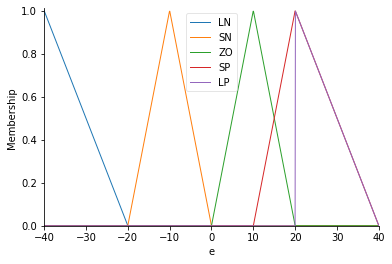

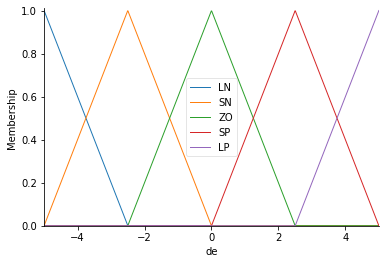

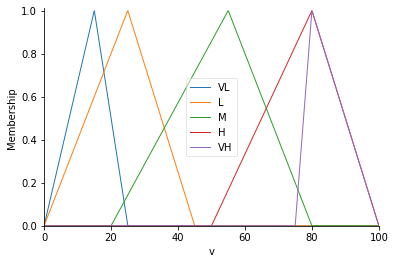

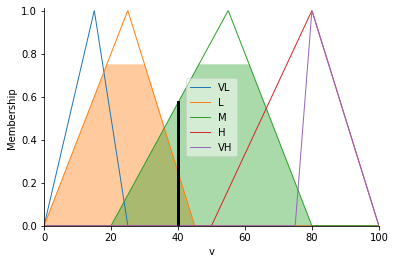

In [22]:
# Thông số đầu vào cần thiết của bồn nước
e  = ctrl.Antecedent(np.linspace(-40, 40, 1000), 'e') # errol
de = ctrl.Antecedent(np.linspace(-5, 5, 1000), 'de')  # d(errol)

# Thông số đầu ra mức nước của bồn
v = ctrl.Consequent(np.linspace(0, 100, 1000), 'v')

# Membership functions
e['LN'] = fuzz.trimf(e.universe,[-40, -40, -20])
e['SN'] = fuzz.trimf(e.universe,[-20, -10, 0])
e['ZO'] = fuzz.trimf(e.universe,[-0, 10, 20])
e['SP'] = fuzz.trimf(e.universe,[10, 20, 40])
e['LP'] = fuzz.trimf(e.universe,[20, 20, 40])

de['LN'] = fuzz.trimf(de.universe,[-5, -5, -2.5])
de['SN'] = fuzz.trimf(de.universe,[-5, -2.5, 0])
de['ZO'] = fuzz.trimf(de.universe,[-2.5, 0, 2.5])
de['SP'] = fuzz.trimf(de.universe,[0, 2.5, 5])
de['LP'] = fuzz.trimf(de.universe,[2.5, 5, 5])

v['VL'] = fuzz.trimf(v.universe,[ 0,  15,  25])
v['L']  = fuzz.trimf(v.universe,[ 0, 25,  45])
v['M']  = fuzz.trimf(v.universe,[20, 55,  80])
v['H']  = fuzz.trimf(v.universe,[50, 80, 100])
v['VH'] = fuzz.trimf(v.universe,[75, 80, 100])

# Tạo một mảng để chứa các luật để máy hiểu phân tích và xử lí
rule = []

# Thêm các luật vào mảng luật đã khai báo ở trên
rule.append(ctrl.Rule(e['LN'] & de['LN'], v['VH']))
rule.append(ctrl.Rule(e['LN'] & de['SN'], v['VH']))
rule.append(ctrl.Rule(e['LN'] & de['ZO'], v['H']))
rule.append(ctrl.Rule(e['LN'] & de['SP'], v['H']))
rule.append(ctrl.Rule(e['LN'] & de['LP'], v['M']))

rule.append(ctrl.Rule(e['SN'] & de['LN'], v['VH']))
rule.append(ctrl.Rule(e['SN'] & de['SN'], v['H']))
rule.append(ctrl.Rule(e['SN'] & de['ZO'], v['H']))
rule.append(ctrl.Rule(e['SN'] & de['SP'], v['M']))
rule.append(ctrl.Rule(e['SN'] & de['LP'], v['L']))

rule.append(ctrl.Rule(e['ZO'] & de['LN'], v['H']))
rule.append(ctrl.Rule(e['ZO'] & de['SN'], v['H']))
rule.append(ctrl.Rule(e['ZO'] & de['ZO'], v['M']))
rule.append(ctrl.Rule(e['ZO'] & de['SP'], v['L']))
rule.append(ctrl.Rule(e['ZO'] & de['LP'], v['L']))

rule.append(ctrl.Rule(e['SP'] & de['LN'], v['M']))
rule.append(ctrl.Rule(e['SP'] & de['SN'], v['M']))
rule.append(ctrl.Rule(e['SP'] & de['ZO'], v['L']))
rule.append(ctrl.Rule(e['SP'] & de['SP'], v['L']))
rule.append(ctrl.Rule(e['SP'] & de['LP'], v['VL']))

rule.append(ctrl.Rule(e['LP'] & de['LN'], v['L']))
rule.append(ctrl.Rule(e['LP'] & de['SN'], v['L']))
rule.append(ctrl.Rule(e['LP'] & de['ZO'], v['L']))
rule.append(ctrl.Rule(e['LP'] & de['SP'], v['VL']))
rule.append(ctrl.Rule(e['LP'] & de['LP'], v['VL']))

# Dùng Ctrl của skfuzzy 
valve_control = ctrl.ControlSystem(rule)
valve_simulation = ctrl.ControlSystemSimulation(valve_control)

# Hàm view() dùng để xuất đồ thị ra
e.view()
de.view()
v.view()

# Nhập thông số đầu vào cho Bồn nước tính toán
valve_simulation.input['e'] = 25
valve_simulation.input['de'] = -2.5
valve_simulation.compute()

# In giá trị đầu ra của độ mở valve
print(valve_simulation.output['v'])

# Xem đường đồ thị của độ mở valve đầu ra đầu ra
v.view(sim = valve_simulation)



> **Bài toán Hệ thống chẩn đoán y tế 🏥**



0.34964998331664926


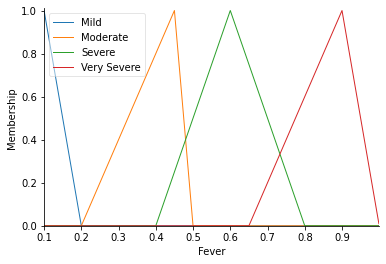

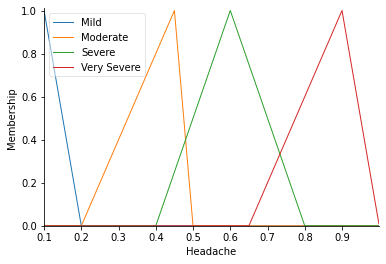

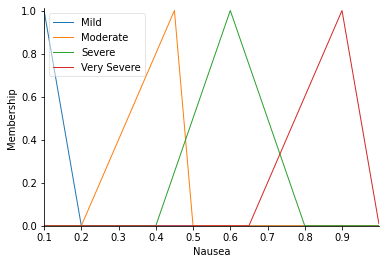

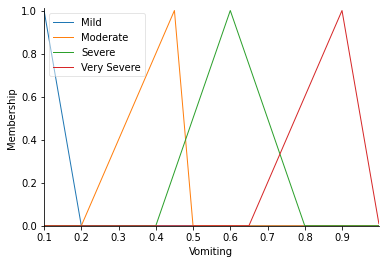

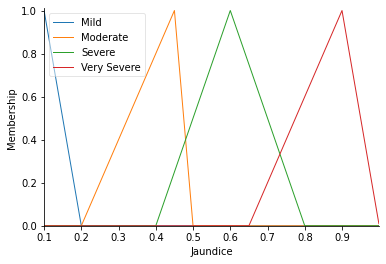

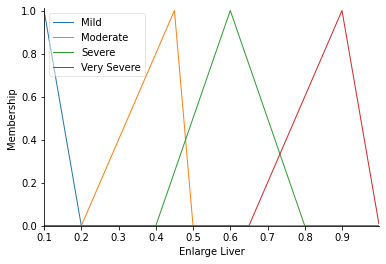

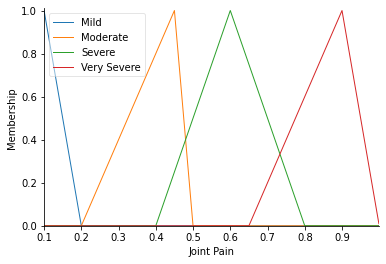

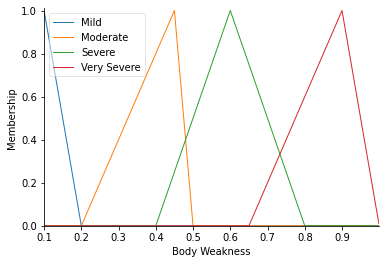

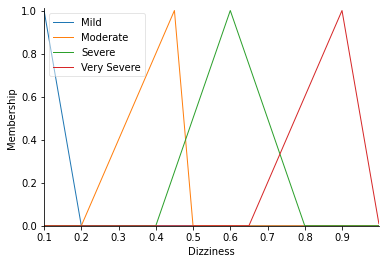

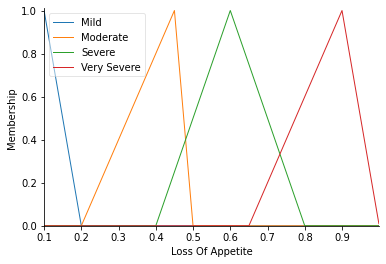

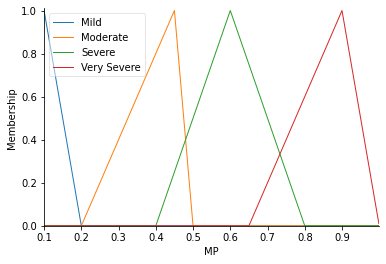

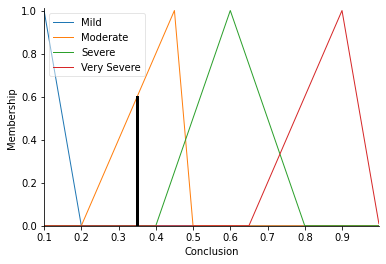

In [62]:
# Sử dụng thư viện numpy để tạo 1 mảng sắp xếp 
fuzzyValues = np.arange(0.1, 1.0, 0.001)

# Khai báo thông số đầu vào các loại bệnh
fever          = ctrl.Antecedent(fuzzyValues, 'Fever')
headache       = ctrl.Antecedent(fuzzyValues, 'Headache')
nausea         = ctrl.Antecedent(fuzzyValues, 'Nausea')
vomiting       = ctrl.Antecedent(fuzzyValues, 'Vomiting')
jaundice       = ctrl.Antecedent(fuzzyValues, 'Jaundice')
enlargeLiver   = ctrl.Antecedent(fuzzyValues, 'Enlarge Liver')
jointPain      = ctrl.Antecedent(fuzzyValues, 'Joint Pain')
bodyWeakness   = ctrl.Antecedent(fuzzyValues, 'Body Weakness')
dizziness      = ctrl.Antecedent(fuzzyValues, 'Dizziness')
lossOfAppetite = ctrl.Antecedent(fuzzyValues, 'Loss Of Appetite')
MP             = ctrl.Antecedent(fuzzyValues, 'MP')

# Kết quả chẩn đoán đầu ra 
conclusion = ctrl.Consequent(fuzzyValues, 'Conclusion')

# Tạo hàm Membership để khai báo vẽ đồ thị theo dạng tam giác
def MembershipFunction(field):
  field['Mild']        = fuzz.trimf(fuzzyValues, [0.05, 0.1, 0.2])
  field['Moderate']    = fuzz.trimf(fuzzyValues, [0.2, 0.45, 0.5])
  field['Severe']      = fuzz.trimf(fuzzyValues, [0.4, 0.6, 0.8])
  field['Very Severe'] = fuzz.trimf(fuzzyValues, [0.65, 0.9, 1.0])
    
# Thực hiện gọi hàm Membership ở trên cho từng loại bệnh
MembershipFunction(fever)
MembershipFunction(headache)
MembershipFunction(nausea)
MembershipFunction(vomiting)
MembershipFunction(jaundice)
MembershipFunction(enlargeLiver)
MembershipFunction(jointPain)
MembershipFunction(bodyWeakness)
MembershipFunction(dizziness)
MembershipFunction(lossOfAppetite)
MembershipFunction(MP)
MembershipFunction(conclusion)

# Thực hiện gán cho các loại kết quả vào 1 dictionary
dict_value = {1: 'Mild', 2: 'Moderate', 3: 'Severe', 4: 'Very Severe'}

# Khai báo mảng để chứa các luật
rule = []

# Thực hiện tạo 1 hàm Makerule để thực hiện thêm các luật vào mảng rule đã khai báo
def MakeRule(i):
    f1  = dict_value[val_fever[i]]
    f2  = dict_value[val_headache[i]]
    f3  = dict_value[val_nausea[i]]
    f4  = dict_value[val_vomiting[i]]
    f5  = dict_value[val_jaundice[i]]
    f6  = dict_value[val_enlargeLiver[i]]
    f7  = dict_value[val_jointPain[i]]
    f8  = dict_value[val_bodyWeakness[i]]
    f9  = dict_value[val_dizziness[i]]
    f10 = dict_value[val_lossOfAppetite[i]]
    f11 = dict_value[val_MP[i]]

    c   = dict_value[condef[i]]

    rule.append(ctrl.Rule(fever[f1] & headache[f2] & nausea[f3] &
        vomiting[f4] & jaundice[f5] & enlargeLiver[f6] & jointPain[f7] &
        bodyWeakness[f8] & dizziness[f9] & lossOfAppetite[f10] & MP[f11], conclusion[c] ))
    
# Thực hiện tạo các luật cho máy hiểu và thực hiện xử lí
val_fever          = [1,2,3,4,2,1,1,2,2,1,3,2,1,3,1,4,1,2,2,4]
val_headache       = [1,1,2,1,1,2,1,2,1,1,3,3,2,3,1,2,4,4,2,3]
val_nausea         = [1,1,1,1,1,2,2,2,2,2,3,2,2,2,1,1,2,4,2,3]
val_vomiting       = [1,1,1,1,2,1,2,2,2,2,3,3,2,3,2,2,2,1,2,3]
val_jaundice       = [1,1,1,1,1,1,1,2,1,1,3,2,1,3,1,3,1,3,1,3]
val_enlargeLiver   = [1,1,1,1,1,1,1,2,3,2,3,3,1,3,1,2,2,3,1,3]
val_jointPain      = [1,2,1,3,2,1,3,2,2,1,3,2,1,3,1,1,1,2,2,3]
val_bodyWeakness   = [1,2,3,3,2,1,3,2,2,1,4,3,2,3,3,4,2,3,2,3]
val_dizziness      = [3,3,3,1,2,2,2,2,3,1,3,2,1,2,1,3,4,4,2,3]
val_lossOfAppetite = [1,3,3,1,3,1,2,2,2,1,3,1,2,2,3,1,1,4,2,3]
val_MP             = [1,2,2,3,2,1,2,2,2,1,2,2,2,3,2,2,2,3,2,2]

condef              = [1,2,3,4,2,1,3,2,2,1,4,3,2,3,3,4,4,4,2,4]

# Gọi hàm for để chạy các luật 
for i in range(20):
    MakeRule(i)

# Dùng hàm view() để xem đồ thị của các thông số đầu vào
fever.view()
headache.view()
nausea.view()
vomiting.view()
jaundice .view()
enlargeLiver.view()
jointPain.view()
bodyWeakness.view()
dizziness.view()
lossOfAppetite.view()
MP.view()

# Dùng Ctrl của skfuzzy 
conclusion_control = ctrl.ControlSystem(rule)
conclusion_simulation = ctrl.ControlSystemSimulation(conclusion_control)

# Nhập thông số đầu vào cho máy tính toán và đưa ra kết quả
conclusion_simulation.inputs({'Fever': 0.45, 'Headache': 0.1, 'Nausea': 0.1, 
                              'Vomiting': 0.2, 'Jaundice': 0.2,'Enlarge Liver': 0.2,'Joint Pain': 0.45,
                              'Body Weakness': 0.3, 'Dizziness': 0.6, 'Loss Of Appetite': 0.8, 'MP': 0.5})

conclusion_simulation.compute()

# In giá trị đầu ra của kết quả chẩn đoán
print(conclusion_simulation.output['Conclusion'])

# Xem đường đồ thị của kết quả chẩn đoán đầu ra
conclusion.view(sim = conclusion_simulation)